In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator

C:\Users\abc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path= 'Face_detection/train'
valid_path= 'Face_detection/valid'
test_path= 'Face_detection/test'

In [3]:
train_batches= ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['human','not_human'], batch_size=10)
valid_batches= ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['human','not_human'], batch_size=10)
test_batches= ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['human','not_human'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type (ims[0])is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
            
    f=plt.figure(figsize=figsize)
    cols=(len(ims)//rows) if len(ims) % 2 == 0 else (len(ims)//rows) +1 
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

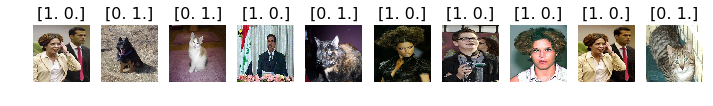

In [5]:
imgs, labels= next(train_batches)
plots(imgs,titles=labels)

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(224,224,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit_generator(train_batches, steps_per_epoch=4,validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 58s - loss: 7.9697 - acc: 0.4750 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/5
 - 35s - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 3/5
 - 34s - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/5
 - 56s - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/5
 - 60s - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000


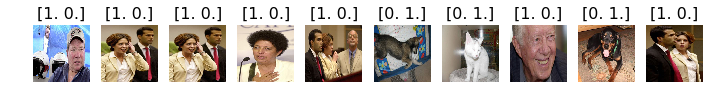

In [9]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [10]:
score = model.evaluate(test_imgs, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 4.8090715408325195
Test accuracy: 0.699999988079071
